In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing  

In [2]:
data = pd.read_csv('Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
Status = []

In [4]:
data['Undergrad'].unique()

array(['NO', 'YES'], dtype=object)

In [5]:
data['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [6]:
data['Urban'].unique()

array(['YES', 'NO'], dtype=object)

In [7]:
# le = preprocessing.LabelEncoder()
# data['Undergrad'] = le.fit_transform(data['Undergrad'])
# data['Urban'] = le.fit_transform(data['Urban'])
# data

In [8]:
data = pd.get_dummies(data)

In [9]:
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [10]:
for i in range(0, (data.shape)[0]):
    if data['Taxable.Income'].iloc[i] <= 30000:
        Status.append('Risky')
    else:
        Status.append('Safe')

In [11]:
data['Status'] = Status
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Status
0,68833,50047,10,1,0,0,0,1,0,1,Safe
1,33700,134075,18,0,1,1,0,0,0,1,Safe
2,36925,160205,30,1,0,0,1,0,0,1,Safe
3,50190,193264,15,0,1,0,0,1,0,1,Safe
4,81002,27533,28,1,0,0,1,0,1,0,Safe
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,Safe
596,69967,55369,2,0,1,1,0,0,0,1,Safe
597,47334,154058,0,1,0,1,0,0,0,1,Safe
598,98592,180083,17,0,1,0,1,0,1,0,Safe


In [12]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [13]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

## Decision Tree Model

### Using entropy criteria

In [14]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy')

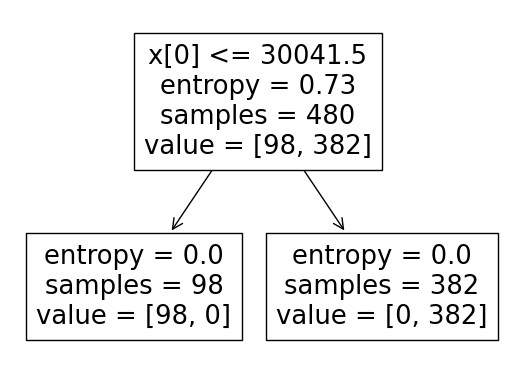

In [15]:
#PLot the decision tree
tree.plot_tree(model)

In [16]:
text = tree.export_text(model)  
print(text) 

|--- feature_0 <= 30041.50
|   |--- class: Risky
|--- feature_0 >  30041.50
|   |--- class: Safe



In [18]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

Safe     94
Risky    26
dtype: int64

In [19]:
preds

array(['Risky', 'Safe', 'Safe', 'Safe', 'Risky', 'Risky', 'Risky', 'Safe',
       'Safe', 'Risky', 'Risky', 'Risky', 'Safe', 'Safe', 'Safe', 'Safe',
       'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe',
       'Safe', 'Safe', 'Safe', 'Risky', 'Safe', 'Risky', 'Safe', 'Risky',
       'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe',
       'Safe', 'Safe', 'Risky', 'Safe', 'Safe', 'Risky', 'Safe', 'Safe',
       'Safe', 'Safe', 'Safe', 'Risky', 'Safe', 'Safe', 'Risky', 'Risky',
       'Safe', 'Safe', 'Risky', 'Safe', 'Safe', 'Safe', 'Risky', 'Safe',
       'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe',
       'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe',
       'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe',
       'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Risky', 'Risky',
       'Risky', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe', 'Safe',
       'Risky', 'Risky', 'Risky', 'Safe', 'Safe', 'Safe',

In [20]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,Risky,Safe
Status,,
Risky,26,0
Safe,0,94


In [21]:
# Accuracy 
np.mean(preds==y_test)

1.0

### Building Decision Tree Classifier (CART) using Gini Criteria

In [23]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini') 

In [24]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier()

[Text(0.5, 0.75, 'x[0] <= 30041.5\ngini = 0.325\nsamples = 480\nvalue = [98, 382]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 98\nvalue = [98, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 382\nvalue = [0, 382]')]

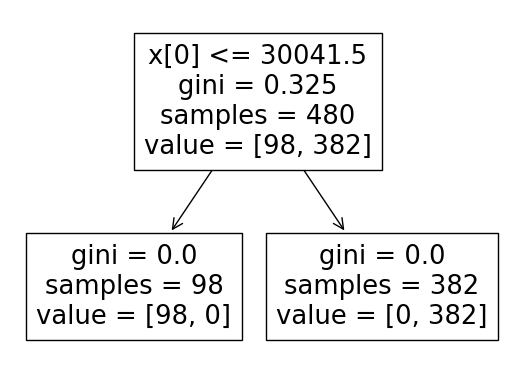

In [25]:
#PLot the decision tree
tree.plot_tree(model_gini)

In [26]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_test)
np.mean(preds==y_test) 

1.0